## SVP100 - Runners Analysis

In August of 2017 I ran my first 100KM off-road trail running race, finishing in 12 hours and 1 minute. I want to use this notebook to see how my performance changed as the race progressed. Does the data tell me anything I can use to get a quicker time in the 2018 race?

This notebook will use the following packages:

* BeautifulSoup: Scraping the data from race result webpage
* Pandas: Organising and analysing the data
* Matplotlib: Displaying the data


In [1]:
# Import the packages we'll use for our analysis

import pandas as pd
import datetime
import requests
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Use line magic function to enable matplotlib to work interactively with iPython

%matplotlib inline
%pylab inline

#Set style
plt.style.use("seaborn-whitegrid")
pylab.rcParams["figure.figsize"] = (8,6)

Populating the interactive namespace from numpy and matplotlib


### Scrap data and load into pandas DataFrame

In [2]:
# Define variable for the URL we wish to load 
# Use the "r" prefix to interpret the raw string i.e. ignore any escape characters
# Print the URL to ensure it looks as expected

url = r'http://www.svp100.co.uk/results-2017/'
print url

http://www.svp100.co.uk/results-2017/


In [3]:
# Create a new object with the URL's webserver response to a HTTP request
# Define a new variable r_text which is the text attribute of the request object which has been initialized
# The text attribute r_text returns the server response in unicode
# Creat a BS object using r_text as an imput 

r = requests.get(url)
r_text = r.text
soup = BeautifulSoup(r_text, 'lxml')

In [4]:
# Define an empty list for each of the variables we want to extract from the webpage
# These will later be used to create a Pandas dataframe

pos, name, bib, gender, start, club = [],[],[],[],[],[]
cp1, cp2, cp3, cp4, cp5, cp6 = [],[],[],[],[],[]
finish, total = [],[]

In [5]:
for row in soup.find_all('tr')[1:]:
    # Create a variable of all the <td> tag pairs in each <tr> tag pair,
    col = row.find_all('td')

    # Create a variable of the string inside 1st <td> tag pair,
    column_0 = col[0].string.strip()
    column_1 = col[1].string.strip()
    column_2 = col[2].string.strip()
    column_3 = col[3].string.strip()
    column_4 = col[4].string.strip()
    
    if not col[5].string == None:column_5 = col[5].string.strip() 
    else:column_5 = ''
    
    column_6 = col[6].string.strip()
    column_7 = col[7].string.strip()
    
    if not col[8].string == None:column_8 = col[8].string.strip() 
    else:column_8 = ''
    
    if not col[9].string == None:column_9 = col[9].string.strip() 
    else:column_9 = ''
    
    if not col[10].string == None:column_10 = col[10].string.strip() 
    else:column_10 = ''
    
    if not col[11].string == None:column_11 = col[11].string.strip() 
    else:column_11 = ''
  
    if not col[12].string == None:column_12 = col[12].string.strip() 
    else:column_12 = ''
    
    if not col[13].string == None:column_13 = col[13].string.strip() 
    else:column_13 = ''
        
    # and append it to first_name variable
    pos.append(column_0)
    name.append(column_1)
    bib.append(column_2)
    gender.append(column_3)
    start.append(column_4)
    club.append(column_5)
    cp1.append(column_6)
    cp2.append(column_7)
    cp3.append(column_8)
    cp4.append(column_9)
    cp5.append(column_10)
    cp6.append(column_11)
    finish.append(column_12)
    total.append(column_13)

In [6]:
# Create a pandas DataFrame from the lists created with parsed data from webpage
# Set the index with the values in the name column

df = pd.DataFrame({'pos':pos,
                  'name': name,
                  'bib': bib,
                  'gender': gender,
                  'start': start,
                  'club': club,
                  'CP1': cp1,
                  'CP2': cp2,
                  'CP3': cp3,
                  'CP4': cp4,
                  'CP5': cp5,
                  'CP6': cp6,
                  'finish': finish,
                  'total': total}, index = name)

In [7]:
# Check that the data looks OK by loading the first two rows

df.head(2)

,CP1,CP2,CP3,CP4,CP5,CP6,bib,club,finish,gender,name,pos,start,total
John Connolly,09:58:30,11:26:51,12:58:00,14:34:00,15:41:00,17:04:49,19,Team Pyllon,17:54:10,Male,John Connolly,1,08:30:00,09:24:10
Charles Harpur,09:56:03,11:22:10,13:20:00,15:14:00,16:31:00,18:13:51,20,Mid Essex Casuals,19:09:10,Male,Charles Harpur,2,08:30:00,10:39:10


### Formatting of columns

In [8]:
df["total"] = [i.encode("utf-8") for i in df["total"]]

In [9]:
def str_to_min(x):
    if not x == '':
        hr_s = float((''.join(x[0]+x[1])))*(60*60)
        min_s = float(''.join(x[3]+x[4]))*60
        sec_s = float(''.join(x[6]+x[7]))
        total_min = ((hr_s + min_s + sec_s)/ 60)
        return round(total_min, 2)

In [10]:
df['total_min'] = df['total'].map(str_to_min)
df["average_min"] = round(df["total_min"].mean(), 2)
df["start"] = datetime.datetime(2017, 8, 12, 7, 0 ,0)

In [11]:
df.loc["Stephen Lemasney"]

CP1                       08:53:55
CP2                       10:51:53
CP3                       12:52:00
CP4                       14:48:00
CP5                       16:19:00
CP6                       18:04:25
bib                            173
club                              
finish                    19:01:33
gender                        Male
name              Stephen Lemasney
pos                              8
start          2017-08-12 07:00:00
total                     12:01:33
total_min                   721.55
average_min                 825.09
Name: Stephen Lemasney, dtype: object

In [12]:
def cp2dt(cp):
    df[cp] = pd.to_datetime(df[cp], format = "%H:%M:%S", errors="coerce")
    df[cp] = df[cp].apply(lambda dt: dt.replace(year = 2017, month = 8, day=12))
    return df[cp]

In [13]:
cps = ["CP1","CP2","CP3","CP4","CP5","CP6","finish"]
for i in cps: df[i] = cp2dt(i)

In [14]:
df["time2cp1"] = df["CP1"] - df["start"]
df["time2cp2"] = df["CP2"] - df["CP1"] 
df["time2cp3"] = df["CP3"] - df["CP2"] 
df["time2cp4"] = df["CP4"] - df["CP3"] 
df["time2cp5"] = df["CP5"] - df["CP4"]
df["time2cp6"] = df["CP6"] - df["CP5"]
df["time2end"] = df["finish"] - df["CP6"]

In [15]:
df.loc["Stephen Lemasney"]

CP1            2017-08-12 08:53:55
CP2            2017-08-12 10:51:53
CP3            2017-08-12 12:52:00
CP4            2017-08-12 14:48:00
CP5            2017-08-12 16:19:00
CP6            2017-08-12 18:04:25
bib                            173
club                              
finish         2017-08-12 19:01:33
gender                        Male
name              Stephen Lemasney
pos                              8
start          2017-08-12 07:00:00
total                     12:01:33
total_min                   721.55
average_min                 825.09
time2cp1           0 days 01:53:55
time2cp2           0 days 01:57:58
time2cp3           0 days 02:00:07
time2cp4           0 days 01:56:00
time2cp5           0 days 01:31:00
time2cp6           0 days 01:45:25
time2end           0 days 00:57:08
Name: Stephen Lemasney, dtype: object

## Summary Stats

In [16]:
summary_stats = df['total_min'].describe()
summary_stats = pd.DataFrame(summary_stats)
summary_stats

,total_min
count,67.000000
mean,825.094925
std,80.862988
min,564.170000
25%,763.340000
50%,848.170000
75%,891.935000
max,927.850000


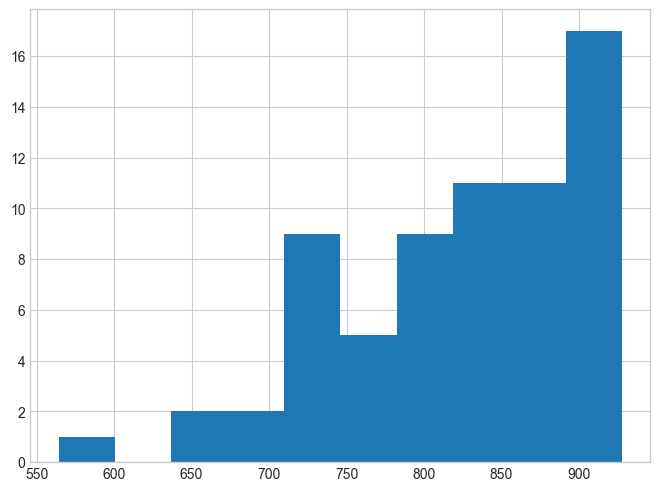

In [17]:
df['total_min'].hist()

## Check Point distances

In [36]:
# Manually create new DataFrame with checkpoints and distances
# Convert the distances to Miles and KM

convert_km = 1.60934
cp = ["time2cp1", "time2cp2", "time2cp3", "time2cp4", "time2cp5", "time2cp6", "time2end"]
cp_miles = [12, 23, 33, 44, 50, 58.5, 63]
cp_miles_s = [12,11,10,11,6,8.5,4.5]
cp_distances = pd.DataFrame({"cp_miles": cp_miles, "cp_miles_s": cp_miles_s}, index = cp)
cp_distances["cp_km"] = cp_distances["cp_miles"] * convert_km
cp_distances["cp_km_s"] = cp_distances["cp_miles_s"] * convert_km
cp_distances

,cp_miles,cp_miles_s,cp_km,cp_km_s
time2cp1,12.0,12.0,19.31208,19.31208
time2cp2,23.0,11.0,37.01482,17.70274
time2cp3,33.0,10.0,53.10822,16.09340
time2cp4,44.0,11.0,70.81096,17.70274
time2cp5,50.0,6.0,80.46700,9.65604
time2cp6,58.5,8.5,94.14639,13.67939
time2end,63.0,4.5,101.38842,7.24203


## Create table with averages data

In [37]:
columns = ["time2cp1","time2cp2","time2cp3","time2cp4","time2cp5","time2cp6","time2end"]
df_time2cp = pd.DataFrame(df, columns= columns)

In [38]:
for i in columns: 
    df[i] = df[i]
df_time2cp.head(8)

,time2cp1,time2cp2,time2cp3,time2cp4,time2cp5,time2cp6,time2end
John Connolly,02:58:30,01:28:21,01:31:09,01:36:00,01:07:00,01:23:49,00:49:21
Charles Harpur,02:56:03,01:26:07,01:57:50,01:54:00,01:17:00,01:42:51,00:55:19
kelly pepper,03:14:44,01:46:22,01:48:54,01:52:00,01:14:00,01:37:49,00:57:06
Colin Harper,03:15:26,01:52:35,01:43:59,02:00:00,01:20:00,01:41:46,00:59:51
Nigel Harrison,01:49:35,01:54:52,01:48:33,02:08:00,01:21:00,01:38:23,00:56:35
Andy Goldsmith,03:19:54,01:52:05,01:51:01,02:23:00,01:20:00,01:44:44,00:51:59
Phil Jackson,01:49:30,01:58:14,01:55:16,02:09:00,01:27:00,01:46:19,00:56:14
Stephen Lemasney,01:53:55,01:57:58,02:00:07,01:56:00,01:31:00,01:45:25,00:57:08


In [39]:
columns = ["time2cp1","time2cp2","time2cp3","time2cp4","time2cp5","time2cp6","time2end"]
df_averages = {}

In [40]:
for i in columns:
    df_averages[str(i)] = df_time2cp[str(i)].mean()

df_averages

{'time2cp1': Timedelta('0 days 02:25:35.206521'),
 'time2cp2': Timedelta('0 days 02:13:09.678160'),
 'time2cp3': Timedelta('0 days 02:10:43.860759'),
 'time2cp4': Timedelta('0 days 02:31:55.068493'),
 'time2cp5': Timedelta('0 days 01:34:58.985915'),
 'time2cp6': Timedelta('0 days 02:08:30.880597'),
 'time2end': Timedelta('0 days 01:12:04.522388')}

In [41]:
#df_averages = df_averages.iloc[3][3]
df_averages = pd.Series(df_averages, name = "2017")
df_averages

time2cp1   02:25:35.206521
time2cp2   02:13:09.678160
time2cp3   02:10:43.860759
time2cp4   02:31:55.068493
time2cp5   01:34:58.985915
time2cp6   02:08:30.880597
time2end   01:12:04.522388
Name: 2017, dtype: timedelta64[ns]

In [42]:
df_averages = pd.DataFrame(df_averages)
df_averages = (df_averages.join(cp_distances))


In [43]:
df_averages["2017_min"] = [(i.total_seconds()/60) for i in df_averages["2017"]]
df_averages["min_km"] = df_averages["2017_min"]/df_averages["cp_km_s"]
df_averages


,2017,cp_miles,cp_miles_s,cp_km,cp_km_s,2017_min,min_km
time2cp1,02:25:35.206521,12.0,12.0,19.31208,19.31208,145.586775,7.538638
time2cp2,02:13:09.678160,23.0,11.0,37.01482,17.70274,133.161303,7.522073
time2cp3,02:10:43.860759,33.0,10.0,53.10822,16.09340,130.731013,8.123269
time2cp4,02:31:55.068493,44.0,11.0,70.81096,17.70274,151.917808,8.581599
time2cp5,01:34:58.985915,50.0,6.0,80.46700,9.65604,94.983099,9.836651
time2cp6,02:08:30.880597,58.5,8.5,94.14639,13.67939,128.514677,9.394767
time2end,01:12:04.522388,63.0,4.5,101.38842,7.24203,72.075373,9.952372


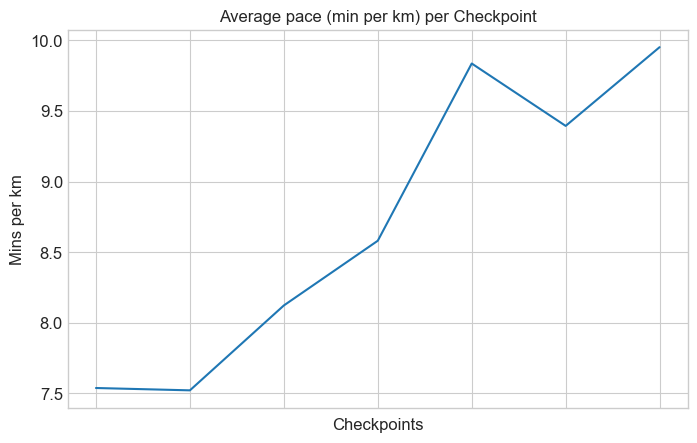

In [44]:
plot = df_averages["min_km"].plot(grid = True, fontsize = 12, figsize  = (8,5))
plot.set_xlabel("Checkpoints", fontsize = 12)
plot.set_ylabel("Mins per km", fontsize = 12)
plot.set_title( "Average pace (min per km) per Checkpoint",fontsize = 12)

# SCRATCH

In [70]:
df_slemasne = df.loc["Stephen Lemasney"][columns]
df_slemasne = pd.DataFrame(df_slemasne)
df_slemasne = df_slemasne.join(df_averages)

In [71]:
df_slemasne

,Stephen Lemasney,2017,cp_miles,cp_miles_s,cp_km,cp_km_s,2017_min,min_km
time2cp1,0 days 01:53:55,02:25:35.206521,12.0,12.0,19.31208,19.31208,145.586775,7.538638
time2cp2,0 days 01:57:58,02:13:09.678160,23.0,11.0,37.01482,17.70274,133.161303,7.522073
time2cp3,0 days 02:00:07,02:10:43.860759,33.0,10.0,53.10822,16.09340,130.731013,8.123269
time2cp4,0 days 01:56:00,02:31:55.068493,44.0,11.0,70.81096,17.70274,151.917808,8.581599
time2cp5,0 days 01:31:00,01:34:58.985915,50.0,6.0,80.46700,9.65604,94.983099,9.836651
time2cp6,0 days 01:45:25,02:08:30.880597,58.5,8.5,94.14639,13.67939,128.514677,9.394767
time2end,0 days 00:57:08,01:12:04.522388,63.0,4.5,101.38842,7.24203,72.075373,9.952372


In [74]:
df_slemasne["slm_mins"] = [(i.total_seconds()/60) for i in df_slemasne["Stephen Lemasney"]]
df_slemasne["slm_min_km"] = df_slemasne["slm_mins"]/df_slemasne["cp_km_s"]
df_slemasne

,Stephen Lemasney,2017,cp_miles,cp_miles_s,cp_km,cp_km_s,2017_min,min_km,slm_mins,slm_min_km
time2cp1,0 days 01:53:55,02:25:35.206521,12.0,12.0,19.31208,19.31208,145.586775,7.538638,113.916667,5.898726
time2cp2,0 days 01:57:58,02:13:09.678160,23.0,11.0,37.01482,17.70274,133.161303,7.522073,117.966667,6.663752
time2cp3,0 days 02:00:07,02:10:43.860759,33.0,10.0,53.10822,16.09340,130.731013,8.123269,120.116667,7.463722
time2cp4,0 days 01:56:00,02:31:55.068493,44.0,11.0,70.81096,17.70274,151.917808,8.581599,116.000000,6.552658
time2cp5,0 days 01:31:00,01:34:58.985915,50.0,6.0,80.46700,9.65604,94.983099,9.836651,91.000000,9.424153
time2cp6,0 days 01:45:25,02:08:30.880597,58.5,8.5,94.14639,13.67939,128.514677,9.394767,105.416667,7.706240
time2end,0 days 00:57:08,01:12:04.522388,63.0,4.5,101.38842,7.24203,72.075373,9.952372,57.133333,7.889132


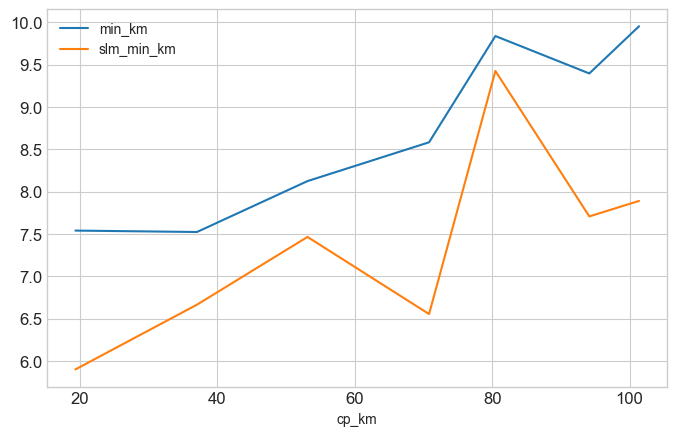

In [75]:
df_slemasne.plot( y = ["min_km","slm_min_km"], x = ["cp_km"], grid = True, fontsize = 12, figsize  = (8,5))


In [78]:
#sns.distplot(df["total_min"])